# Heart Disease Prediction 
using 3 Machine Learning Models

    Support Vector Machine (SVM)
    K-Nearset Neighbour (KNN)
    Artificial Neural Network - Multilayer Perceptron (ANN)

South Africa Heart Disease Dataset Source:
https://www.openml.org/d/1498

# Data Description

Predictors:

    sbp : systolic blood pressure
    tobacco : cumulative tobacco (kg)
    ldl : low densiity lipoprotein cholesterol
    adiposity
    famhist : family history of heart disease (Present, Absent)
    type : type-A behavior
    obesity
    alcohol : current alcohol consumption
    age : age at onset

Response:

    chd : coronary heart disease



# Importing basic libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading data file

In [8]:
data = pd.read_csv('heart_disease.csv');

In [9]:
column = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'type', 'obesity', 'alcohol', 'age', 'chd']

In [10]:
data.columns = column

# Preprocessing

In [11]:
data.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
type         0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

No null entries... So, no need to deal with missing values

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['famhist'] = encoder.fit_transform(data['famhist'])
data['chd'] = encoder.fit_transform(data['chd'])

# Data description

In [13]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [14]:
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.584416,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,1.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


# Variation of parameters for first 50 entries

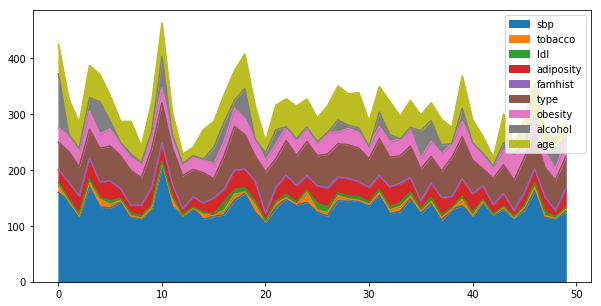

In [15]:
data.iloc[0:50,0:9].plot(kind='area', figsize=(10,5))

# Train-Test split

In [16]:
X = data.iloc[:, 0:9].values
Y = data.iloc[:, 9].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0)

# SVM
kernel = Linear

degree = 3

gamma = auto

In [17]:
from sklearn import svm
svm_clf = svm.SVC(kernel = 'linear')

In [18]:
svm_clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
Y_pred_svm = svm_clf.predict(X_test)
Y_pred_svm

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
cm_svm

array([[53,  8],
       [18, 14]], dtype=int64)

In [22]:
svm_result = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy : ",svm_result)

Accuracy :  0.7204301075268817


In [23]:
precision_svm = cm_svm[0][0] / (cm_svm[0][0] + cm_svm[1][0])
recall_svm = cm_svm[0][0] / (cm_svm[0][0] + cm_svm[0][1])

precision_svm, recall_svm

(0.7464788732394366, 0.8688524590163934)

# KNN
no. of neighbours = 5

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, leaf_size=60, algorithm='brute')

In [25]:
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
Y_pred_knn = knn_clf.predict(X_test)
Y_pred_knn

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0], dtype=int64)

In [27]:
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
cm_knn

array([[48, 13],
       [23,  9]], dtype=int64)

In [28]:
knn_result = accuracy_score(Y_test, Y_pred_knn)
print("Accuracy : ",knn_result)

Accuracy :  0.6129032258064516


In [29]:
precision_knn = cm_knn[0][0] / (cm_knn[0][0] + cm_knn[1][0])
recall_knn = cm_knn[0][0] / (cm_knn[0][0] + cm_knn[0][1])

precision_knn, recall_knn

(0.676056338028169, 0.7868852459016393)

# ANN
alpha = 1e-4

layers : 

9 inputs input layer 

2 hidden layers of 14 neurons each

In [30]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [31]:
ann_clf  = MLPClassifier()

parameters = {'solver': ['lbfgs'],
             'alpha': [1e-4],
             'hidden_layer_sizes': (9,14,14,2),
             'random_state': [1]}

In [32]:
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train,Y_train)

ann_clf = grid_obj.best_estimator_

In [33]:
ann_clf.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=14, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [34]:
Y_pred_ann = ann_clf.predict(X_test)
Y_pred_ann

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [35]:
cm_ann = confusion_matrix(Y_test, Y_pred_ann)
cm_ann

array([[55,  6],
       [19, 13]], dtype=int64)

In [36]:
ann_result = accuracy_score(Y_test, Y_pred_ann)
print("Accuracy : ",ann_result)

Accuracy :  0.7311827956989247


In [37]:
precision_ann = cm_ann[0][0] / (cm_ann[0][0] + cm_ann[1][0])
recall_ann = cm_ann[0][0] / (cm_ann[0][0] + cm_ann[0][1])

precision_ann, recall_ann

(0.7432432432432432, 0.9016393442622951)

# Logistic Regression Algorithm

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
Y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[53,  8],
       [17, 15]], dtype=int64)

In [42]:
lr_result = accuracy_score(Y_test, Y_pred)
print("Accuracy : ",lr_result)

Accuracy :  0.7311827956989247


In [51]:
Precision_lr = cm[0][0] / (cm[0][0] + cm[1][0])
recall_lr = cm[0][0] / (cm[0][0] + cm[0][1])

Precision_lr, recall_lr

(0.7571428571428571, 0.8688524590163934)

# Performance comparison and graphs

In [56]:
results = {'Accuracy': [svm_result*100, knn_result*100, ann_result*100,svm_result*100]}
idx = ['Support Vector Machine', 'K-Nearest Neighbors', 'Artificial Neural Network','Logistic regression']

results = pd.DataFrame(results, index=idx)

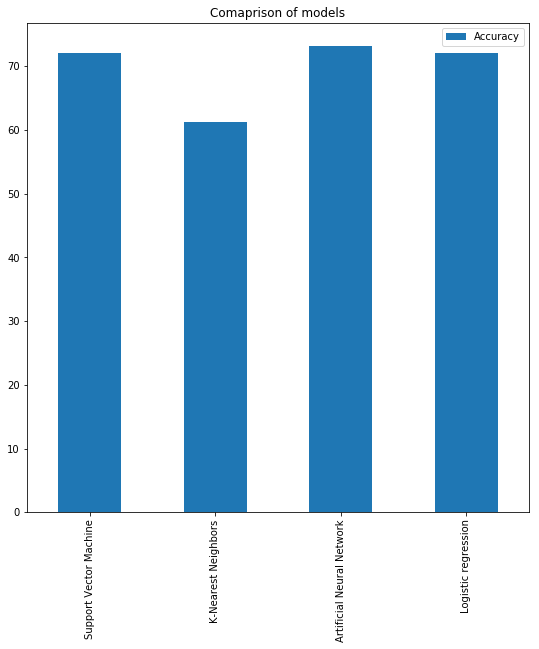

In [57]:
fig = results.plot(kind='bar', title='Comaprison of models', figsize =(9,9))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8F879B550>],
      dtype=object)

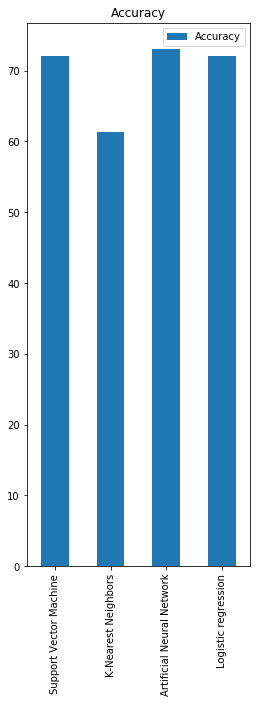

In [58]:
results.plot(subplots=True, kind ='bar', figsize=(4,10))

In [ ]:
Maximum accuracy : ANN,LR

Maximum Precision : LR

Maximum Recall : ANN